# Loan prediction by using logistic regression

In [2]:
#import data
import pandas as pd
import numpy as np

In [3]:
loan=pd.read_csv(r'C:\Users\Dell\Data\LoanData.csv')

In [4]:
import warnings

In [5]:
loan

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [6]:
loan.describe(include='all')

,gender,married,ch,income,loanamt,status
count,601,611,564.000000,614.000000,592.000000,614
unique,2,2,NaN,NaN,NaN,2
top,Male,Yes,NaN,NaN,NaN,Y
freq,489,398,NaN,NaN,NaN,422
mean,NaN,NaN,0.842199,5403.459283,146.412162,NaN
std,NaN,NaN,0.364878,6109.041673,85.587325,NaN
min,NaN,NaN,0.000000,150.000000,9.000000,NaN
25%,NaN,NaN,1.000000,2877.500000,100.000000,NaN
50%,NaN,NaN,1.000000,3812.500000,128.000000,NaN
75%,NaN,NaN,1.000000,5795.000000,168.000000,NaN


In [7]:
loanprep=loan.copy()

In [8]:
loanprep

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [9]:
loanprep.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [10]:
loanprep=loanprep.dropna()

In [11]:
loanprep.isnull().sum()

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [12]:
loanprep.drop(["gender"], axis=1)

,married,ch,income,loanamt,status
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
5,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...
609,No,1.0,2900,71.0,Y
610,Yes,1.0,4106,40.0,Y
611,Yes,1.0,8072,253.0,Y
612,Yes,1.0,7583,187.0,Y


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

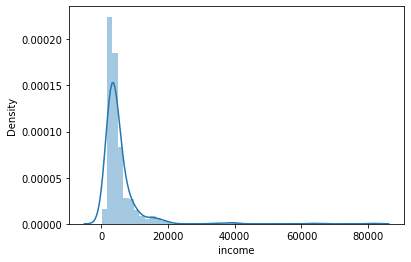

In [13]:
import seaborn as sns
sns.distplot(loanprep['income'])

In [14]:
loanprep.dtypes

gender      object
married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [15]:
#use dummy variables
loanprep=pd.get_dummies(loanprep, drop_first=True)

In [16]:
#Scaling of data
from sklearn.preprocessing import StandardScaler

In [17]:
scaler_=StandardScaler()

In [18]:
loanprep['income']=scaler_.fit_transform(loanprep[['income']])

In [19]:
loanprep['loanamt']=scaler_.fit_transform(loanprep[['loanamt']])

In [20]:
loanprep

,ch,income,loanamt,gender_Male,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,1,0
2,1.0,-0.392077,-0.971015,1,1,1
3,1.0,-0.461621,-0.294478,1,1,1
4,1.0,0.108246,-0.031380,1,0,1
5,1.0,0.011017,1.547205,1,1,1
...,...,...,...,...,...,...
609,1.0,-0.408754,-0.908372,0,0,1
610,1.0,-0.207624,-1.296754,1,1,1
611,1.0,0.453802,1.371807,1,1,1
612,1.0,0.372249,0.544929,1,1,1


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

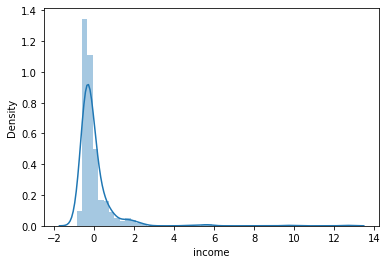

In [21]:
import seaborn as sns
sns.distplot(loanprep['income'])

In [22]:
loanprep.corr()

,ch,income,loanamt,gender_Male,married_Yes,status_Y
ch,1.000000,-0.035671,-0.021177,0.010878,0.016856,0.559912
income,-0.035671,1.000000,0.524141,0.046995,0.045983,-0.027201
loanamt,-0.021177,0.524141,1.000000,0.103965,0.171934,-0.052089
gender_Male,0.010878,0.046995,0.103965,1.000000,0.363102,0.048585
married_Yes,0.016856,0.045983,0.171934,0.363102,1.000000,0.094535
status_Y,0.559912,-0.027201,-0.052089,0.048585,0.094535,1.000000


<AxesSubplot:>

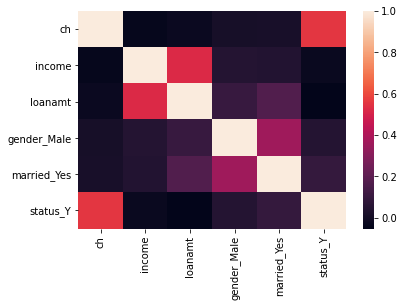

In [23]:
sns.heatmap(loanprep.corr())

In [24]:
loanprep.head(10)

,ch,income,loanamt,gender_Male,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,1,0
2,1.0,-0.392077,-0.971015,1,1,1
3,1.0,-0.461621,-0.294478,1,1,1
4,1.0,0.108246,-0.031380,1,0,1
5,1.0,0.011017,1.547205,1,1,1
6,1.0,-0.503315,-0.607689,1,1,1
7,0.0,-0.386073,0.181603,1,1,0
8,1.0,-0.224302,0.306888,1,1,1
9,1.0,1.249148,2.574538,1,1,0
10,1.0,-0.358722,-0.920901,1,1,1


In [25]:
#Preparing data for train and test splitting

In [26]:
Y=loanprep[['status_Y']]

In [27]:
X=loanprep.drop(['status_Y'],axis=1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=1234, stratify=Y)

In [30]:
X.shape

(529, 5)

In [31]:
Y.shape

(529, 1)

In [32]:
#Applying logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(X_train, Y_train)

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [36]:
Y_predict=lr.predict(X_test)

In [37]:
Y_predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=uint8)

In [38]:
#Evaluation

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm=confusion_matrix(Y_test, Y_predict)

In [41]:
cm

array([[ 29,  20],
       [  2, 108]], dtype=int64)

In [42]:
score=lr.score(X_test, Y_test)

In [43]:
score

0.8616352201257862

## Final Accuracy of the model is 86%

In [44]:
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_predict))
print('MSE:', metrics.mean_squared_error(Y_test, Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

MAE: 3.3333333333333335
MSE: 0.13836477987421383
RMSE: 0.3719741656005345
